## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Dataset

In [2]:
data=pd.read_csv('spam.csv')
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [3]:
data.shape

(5572, 2)

## Checking information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## Applying Label Encoder

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [6]:
data['Category']=le.fit_transform(data['Category'])

In [7]:
data.head(10)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


## Checking null values

In [8]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

## Applying Count Vectorizer

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()

In [10]:
x=data['Message']
y=data['Category']

## Splitting the dataset into training and testing dataset

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
x_train_count=v.fit_transform(x_train.values)
x_train_count.toarray()[:3]
x_test_count=v.transform(x_test)

## Applying MultinomialNB from Naive Baeyes 

In [13]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()

In [14]:
mb.fit(x_train_count,y_train)

MultinomialNB()

In [15]:
mb.score(x_test_count,y_test)  #this score is the best

0.9919282511210762

## Applying BernoulliNB from Naive Baeyes

In [16]:
from sklearn.naive_bayes import BernoulliNB
cb=BernoulliNB()

In [17]:
cb.fit(x_train_count,y_train)

BernoulliNB()

In [18]:
cb.score(x_test_count,y_test)

0.9802690582959641

## Applying ComplementNB from Naive Baeyes

In [19]:
from sklearn.naive_bayes import ComplementNB
gb=ComplementNB()

In [20]:
gb.fit(x_train_count,y_train)

ComplementNB()

In [21]:
gb.score(x_test_count,y_test)

0.9811659192825112

### From the above MultinomialNB gave the best score, so we will use MultinomialNB 

## Confusion Matrix

In [22]:
y_pred=mb.predict(x_test_count)

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm

array([[966,   9],
       [  0, 140]], dtype=int64)

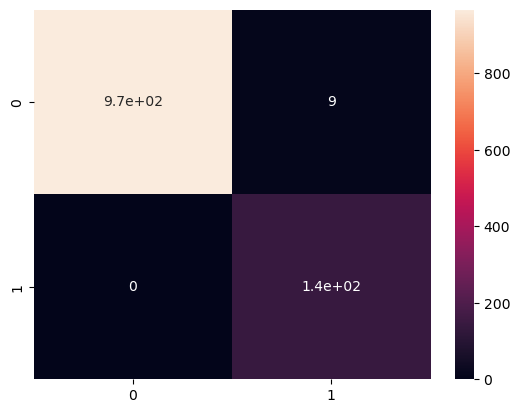

In [24]:
sns.heatmap(cm,annot=True)
plt.show()

## Classification report


In [25]:
from sklearn.metrics import classification_report
cr=classification_report(y_pred,y_test)
cr


'              precision    recall  f1-score   support\n\n           0       1.00      0.99      1.00       975\n           1       0.94      1.00      0.97       140\n\n    accuracy                           0.99      1115\n   macro avg       0.97      1.00      0.98      1115\nweighted avg       0.99      0.99      0.99      1115\n'